# ==== Consumo de energía de electrodomésticos ====
* INFORMACIÓN DEL CONJUNTO DE DATOS :

El conjunto de datos es de 10 min durante aproximadamente 4,5 meses. Las condiciones de temperatura y humedad de la casa se monitorearon con una red de sensores inalámbricos ZigBee. Cada nodo inalámbrico transmitió las condiciones de temperatura y humedad alrededor de 3,3 min. Luego, los datos inalámbricos se promediaron durante períodos de 10 minutos. Los datos de energía se registraron cada 10 minutos con medidores de energía m-bus. El clima de la estación meteorológica del aeropuerto más cercano (Aeropuerto de Chievres, Bélgica) se descargó de un conjunto de datos públicos de Reliable Prognosis (rp5.ru) y se fusionó con los conjuntos de datos experimentales utilizando la columna de fecha y hora. Se han incluido dos variables aleatorias en el conjunto de datos para probar los modelos de regresión y filtrar los atributos no predictivos (parámetros).
INFORMACIÓN DE ATRIBUTOS:

* date time year-month-day hour:minute:second (fecha hora año-mes-día hora:minuto:segundo)
* Appliances(Electrodomésticos), energy use in Wh (uso de energía en Wh)
* lights (iluminacion), uso de energía de los artefactos de iluminación en la casa en Wh
* T1, temperatura en el área de la cocina, en Celsius
* RH_1, Humedad en el área de la cocina, en %
* T2, Temperatura en el área de la sala, en Celsius
* RH_2, Humedad en el salón, en %
* T3, Temperatura en zona de lavadero
* RH_3, Humedad en zona de lavadero, en %
* T4, temperatura en la sala de oficina, en grados Celsius
* RH_4, Humedad en sala de oficina, en %
* T5, Temperatura en baño, en Celsius
* RH_5, Humedad en baño, en %
* T6, Temperatura exterior del edificio (lado norte), en Celsius
* RH_6, Humedad exterior del edificio (lado norte), en %
* T7, Temperatura en sala de planchado, en Celsius
* RH_7, Humedad en sala de planchado, en %
* T8, temperatura en la habitación de adolescentes 2, en grados Celsius
* RH_8, Humedad en habitación adolescente 2, en %
* T9, temperatura en la habitación de los padres, en Celsius
* RH_9, Humedad en la habitación de los padres, en %
* A, temperatura exterior (de la estación meteorológica de Chievres), en grados Celsius
* Pressure (Presión de la estación meteorológica de Chievres), en mm Hg
* RH_out, Humedad exterior (de la estación meteorológica de Chievres), en %
* Wind speed( velocidad del viento de la estación meteorológica de Chievres), en m/s
* Visibility (visibilidad desde la estación meteorológica de Chievres), en km
* Tdewpoint (Punto de rocío de la estación meteorológica de Chievres), °C
* rv1, variable aleatoria 1, adimensional
* rv2, variable aleatoria 2, adimensional

Donde se indica, los datos por hora (luego interpolados) de la estación meteorológica del aeropuerto más cercano (Aeropuerto de Chievres, Bélgica) se descargaron de un conjunto de datos públicos de Reliable Prognosis, rp5.ru. Se obtuvo permiso de Reliable Prognosis para la distribución de los 4,5 meses de datos meteorológicos.

## Importando Librerias:

In [1]:
# Importando Librerías Necesarias Para Regresión Con Árboles De Decisión Y Random Forest
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.model_selection import train_test_split

## Leyendo el conjunto de datos:

In [2]:
# LEYENDO EL CONJUNTO DE DATOS DE EJEMPLOS
df = pd.read_csv('./energydata_complete.csv')

# IMPRIMIENDO LA CABECERA
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### * Eliminando mi variable "date"

In [3]:
print(df['date'].describe());
print("\n================== ELIMINADA =================\n");
df = df.drop('date', axis=1)
print(df.info())

count                   19735
unique                  19735
top       2016-01-11 17:00:00
freq                        1
Name: date, dtype: object

================== ELIMINADA =================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 

## Tabla a Detalle

In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## Imprimiendo la cabezera:

In [5]:
print(df.head())

   Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...         T9   RH_9     T_out  Press_mm_hg  RH_out  \
0  19.000000  45.566667  ...  17.033333  45.53  6.600000        733.5    92.0   
1  19.000000  45.992500  ...  17.066667  45.56  6.483333        733.6    92.0   
2  18.926667  45.890000  ...  17.000000  45.50  6.366667        733.7    92.0   
3  18.890000  45.723333  ...  17.000000  45.40  6.250000        733.8    92.0   
4  18.890000  45.530000  ...  17.000000  45.40  6.133333        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        r

## Verificando la cantidad de valores Nulos:

In [6]:
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## Sacando variables predictoras y variable a predecir:

In [7]:
x = df.drop("Appliances", axis=1)
y = df.iloc[:, 0]

## Observando la distribución de la variable a predecir (y)

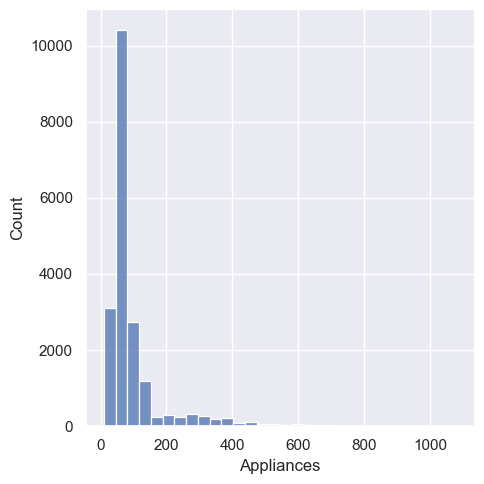

In [8]:
import seaborn as sns 

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(y, bins=30)
plt.show()

## Distribución de las variables predictoras (x)

 						 ==== 1ER GRUPO ====



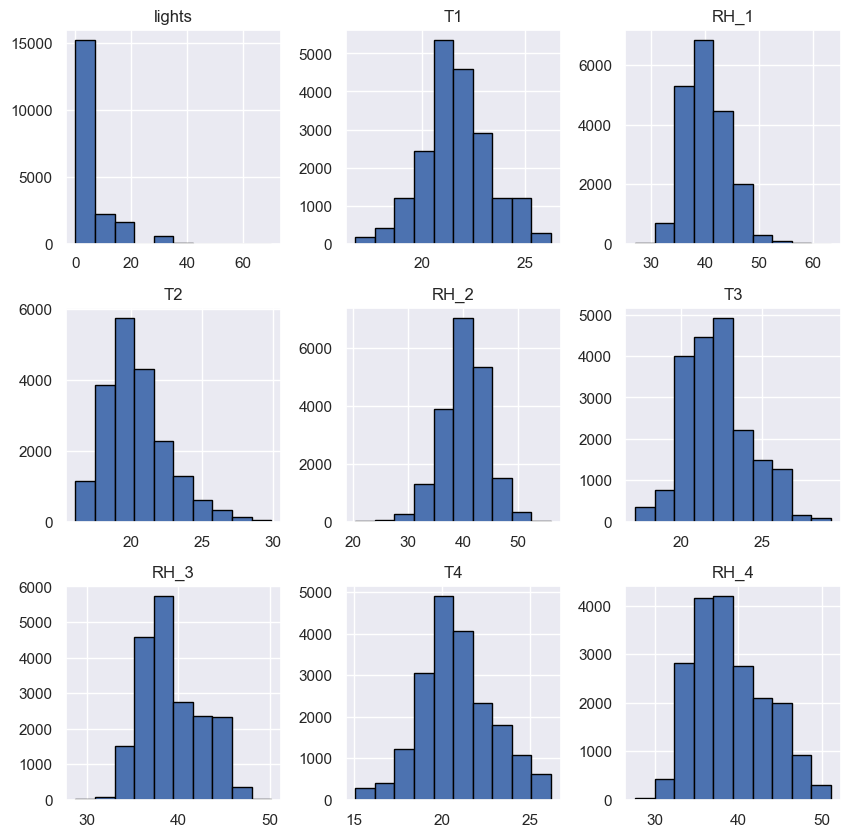

In [9]:
print(" \t\t\t\t\t\t ==== 1ER GRUPO ====\n")
df.hist(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 
           'T3', 'RH_3', 'T4', 'RH_4'],edgecolor='black', linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

 						 ==== 2DO GRUPO ====



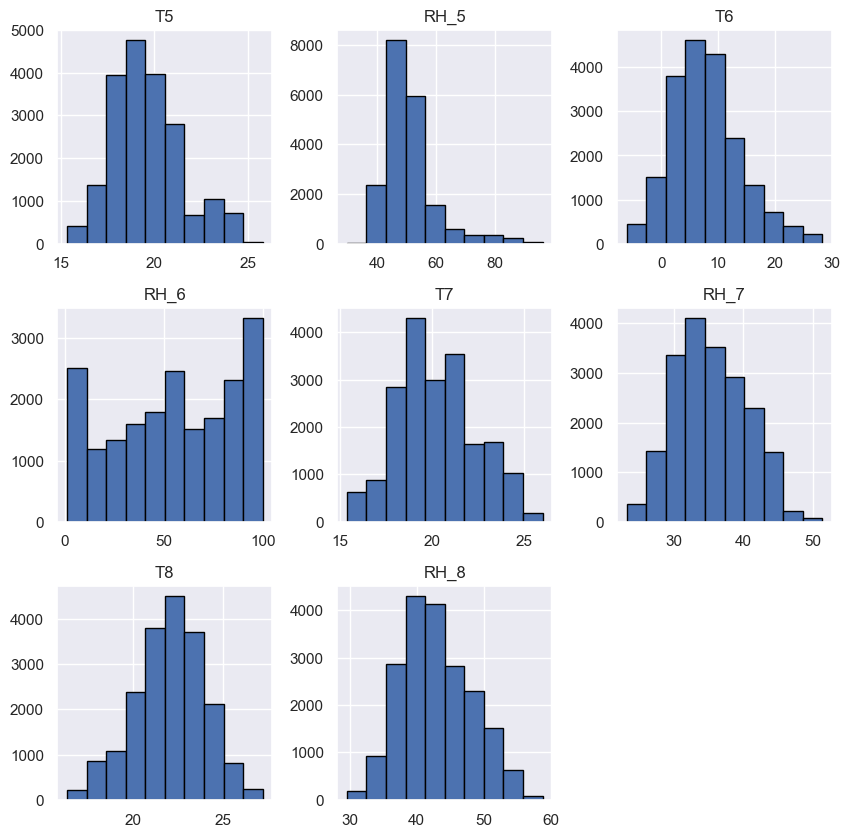

In [10]:
print(" \t\t\t\t\t\t ==== 2DO GRUPO ====\n")
df.hist(['T5', 'RH_5', 'T6', 'RH_6', 
           'T7', 'RH_7', 'T8', 'RH_8'],edgecolor='black', linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

 						 ==== 3ER GRUPO ====



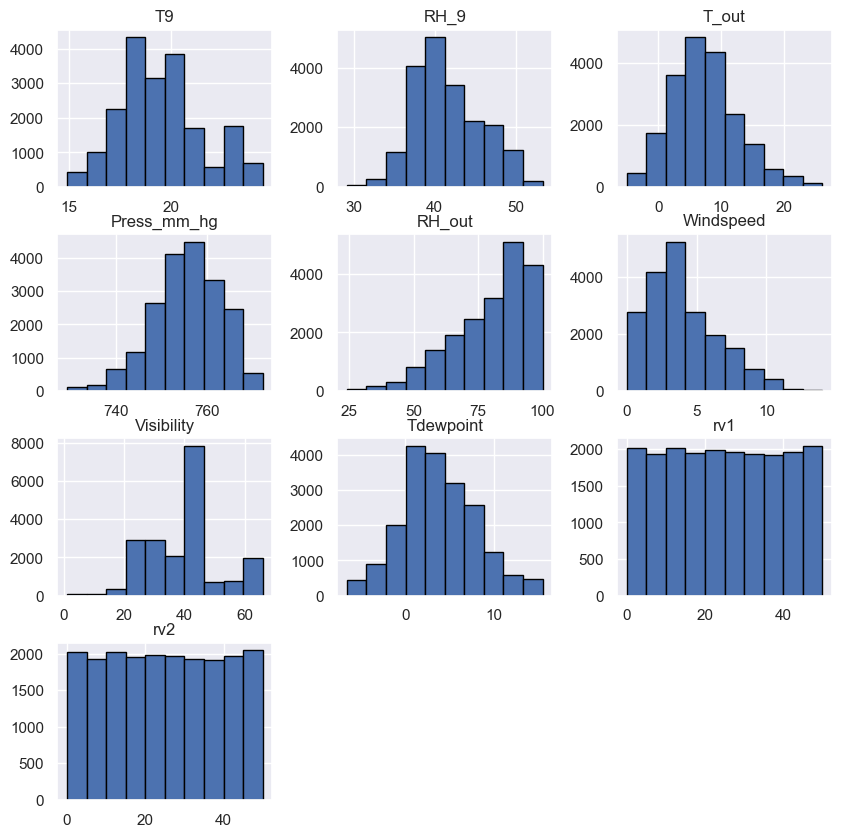

In [11]:
print(" \t\t\t\t\t\t ==== 3ER GRUPO ====\n")
df.hist(['T9', 'RH_9', 'T_out', 'Press_mm_hg', 
           'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],edgecolor='black', linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Inspección de variables predictoras correlacionadas

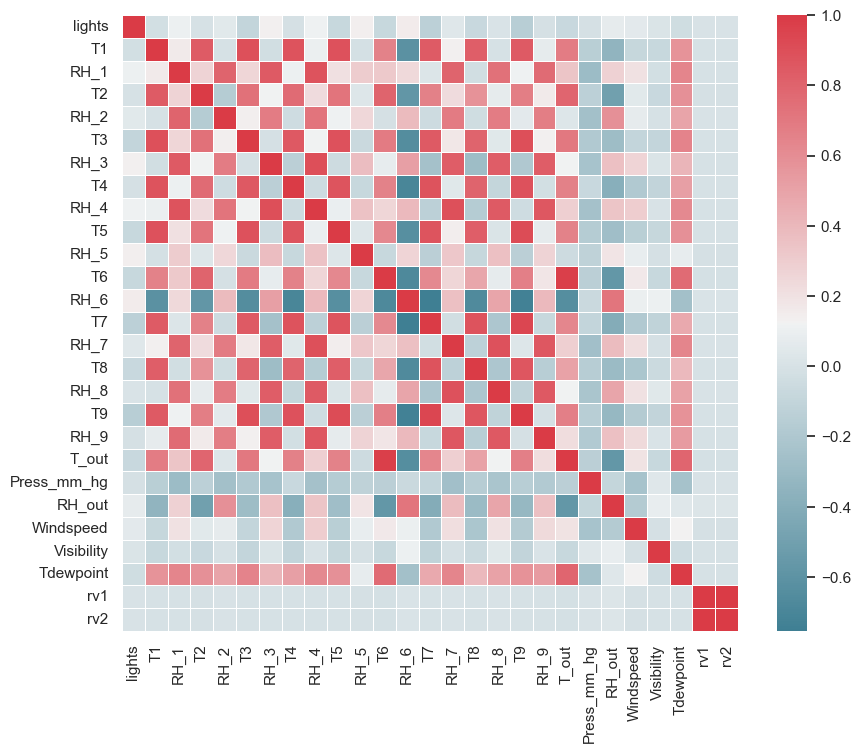

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
corr = x.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
          cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, linewidths=.5)
plt.show() 

## Función para la detección de función correlación

In [13]:
def corr_feature_detect(data, threshold):
     
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() # valor absoluto del coef corr
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] # eliminar la diagonal
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
    
            # encontrar todas las características correlacionadas con una sola característica
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            # agregar el bloque de características a la lista
            correlated_groups.append(correlated_block)
    return correlated_groups

## Invocando la función

In [14]:
corr = corr_feature_detect(data=x,threshold=0.95)
for i in corr:
    print(i,'\n')

  feature1 feature2      corr
0    T_out       T6  0.974787 



### La función ha detectado una correlación entre las variables "T_out" y "T6" del 97%
A continuación, vamos a analizar éstas variables con gráficas de dispersión, y aplicando una prueba de correlación no paramétrica, dado que algunas de ellas no muestran una distribución normal.

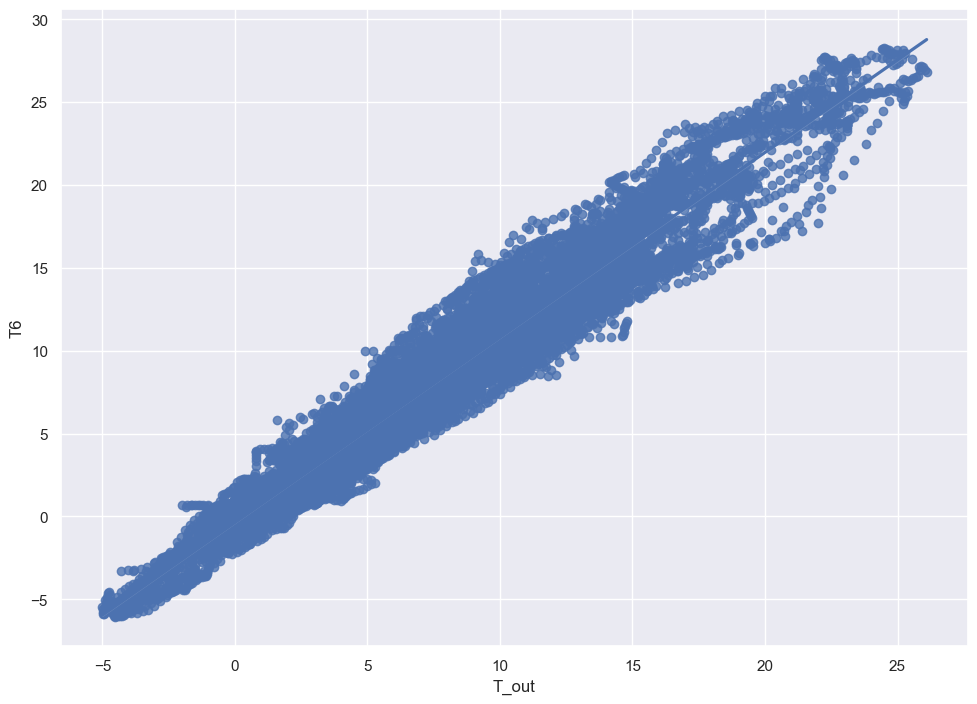

In [15]:
from pandas.plotting import scatter_matrix

#Explorando un poco más la relación entre mean T_out y T6
sns.regplot(x='T_out', y='T6', data=x);
sns.set(rc={'figure.figsize':(2,5)})
plt.show()

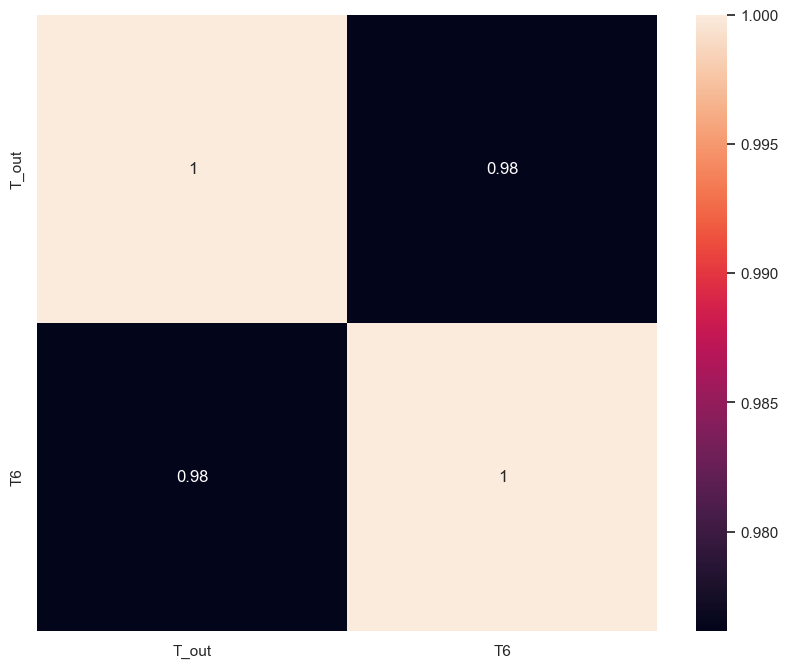

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = x[['T_out', 'T6']].corr(method='spearman')
sns.heatmap(corr, annot=True)
plt.show() 

### La variable "T_out"está correlacionada de acuerdo al coeficiente de correlación de Spearman con la variable "T6", por lo tanto se debe eliminar del estudio.

In [17]:
x.drop(['T_out'], axis=1, inplace = True) 
#Elimina las variables correlacionadas del estudio

# Seleccion de caracteristica - Filter

## Filtro basado en correlación

In [18]:
corr_matrix = df.corr(method='spearman')
corr_matrix = corr_matrix.abs().unstack()
corr_matrix['Appliances'].sort_values(ascending=False)   

Appliances     1.000000
T2             0.305091
lights         0.302420
RH_out         0.269086
T1             0.244049
T6             0.242477
T8             0.236147
RH_6           0.229734
RH_8           0.217236
T3             0.216852
T_out          0.215504
T4             0.207153
T5             0.185846
T7             0.181876
T9             0.166976
RH_9           0.164553
RH_2           0.119736
RH_7           0.119409
Windspeed      0.112320
Press_mm_hg    0.096176
Tdewpoint      0.075221
RH_1           0.060519
RH_3           0.057066
RH_5           0.044904
RH_4           0.020233
rv1            0.009289
rv2            0.009289
Visibility     0.003546
dtype: float64

### No se obseva una fuerte relación de las variables predictoras con respecto a la variable a predecir. 

# APLICANDO LOS MODELOS

## * REGRESSION

In [19]:
# CÓDIGO PARA REGRESIÓN

## * TREE

In [20]:
# CÓDIGO PARA TREE

## * Random_Forest

In [21]:
# CÓDIGO PARA RANDOM FOREST

## * NEURAL NETWORK (Redes Neuronales)

In [22]:
# CÓDIGO PARA RN

## * DEED

In [23]:
# CÓDIGO PARA DEED